# **Exercises SP_2018_4**

## **Marcell Kujbus**

## Exercise 1: One line - exercises on lists (~ 10 min)

* load the payment.json file. This file has two keys: one with that explain the values contained in the data and their type and one that contains the data.
The data are a simulation of an interbank poayment network.
Each element contained in the data list is a event in the payment network.
* explore and show what are the information that we have for each event.
* create a list for each value contained in each event (e.g. all the data in one list, all the input in one list, ecc..) and create a dictionary called `data` that has as a key the information contained in the list and as values the corresponding list.
e.g. data['dates'] --> list of dates
* create a complete directed network of 50 nodes where the name of the nodes are the values.
  Associate to a link (a,b) a value `n_transaction` that counts the number of transaction
  that go from a to b. Do the same with `amount_exc` and associate to it the sum of the values exchanged. Drop all the links that have n_transaction == 0.
  
  [You can also only create the links going through the transactions and modifying the values associate to the links as soon as new transaction between the two parties appear. In this way you don't have to create all the links and delete the empty ones afterwards]
* create a function that given the data dictionary create the network at the previous point, but just with the transaction between two given dates and times.
* plot the network between `8:00:00` and `12:00:00` setting the link width proportional to the `amount_exc`
* plot the network between `12:00:00` and `19:00:00` setting the link width proportional to the `n_transaction`

In [144]:
import json
with open('payment.json') as json_data:
    d = json.load(json_data)

In [160]:
data = {}
for key in d['data'][0].keys():
    data[key] = [d['data'][i][key] for i in range(0, len(d['data']))]

In [ ]:
G = nx.DiGraph()

## Exercise 2

* Create a loop which runs for  p=0.0002 - 0.003 with steps 0.0002
* Inside the loop create Erdős-Rényi graphs with N=1000 nodes and parameter p
* Calculate the size of the largest component for each p (S[p])
* Calculate to variance of the size of the connected components <b>without the largest one</b> for each p (X[p])
* Create two plots one for S[p] and another for X[p]

In [72]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [104]:
p0 = 0.0002 #lower prob in the Erdos-Renyi model
p1 = 0.003 #upper prob in the Erdos-Renyi model
step = 0.0002
n = 1000 #1000 nodes
sizes = [] 
pvals = np.arange(p0, p1+step, step)
for p in pvals:
    G = nx.erdos_renyi_graph(n, p)
    Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
    sizes.append( len(Gcc[0]) )

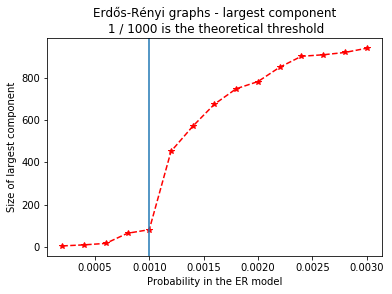

In [105]:
plt.figure()
plt.plot(pvals, sizes, 'r*--') #r is red
plt.axvline(x = 1/n)
plt.xlabel('Probability in the ER model')
plt.ylabel('Size of largest component')
plt.title('Erdős-Rényi graphs - largest component\n 1 / 1000 is the theoretical threshold')
plt.show()

In [142]:
var = []
for p in pvals:
    G = nx.erdos_renyi_graph(n, p)
    Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
    lengths = [len(Gcc[i]) for i in range(1, len(Gcc))]
    var.append( np.var(lengths) )


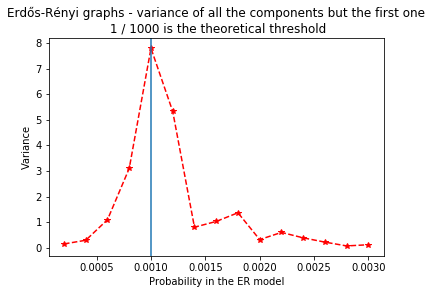

In [143]:
plt.figure()
plt.plot(pvals, var, 'r*--') #r is red
plt.axvline(x = 1/n)
plt.xlabel('Probability in the ER model')
plt.ylabel('Variance')
plt.title('Erdős-Rényi graphs - variance of all the components but the first one\n 1 / 1000 is the theoretical threshold')
plt.show()

### Exercise 3
* Download from the <tt>openexchangerates.org</tt> website the exchange rates from 2007-2012 for each month for day 18
* (Beware! You can make 1000 queries per month so try to download it only once. We have uploaded the datafiles to the moodle for backup reasons), but we want to see the code that if run retrieve the data.
* Define the following list of currencies
<pre>
curr = ["HUF", "CZK", "CHF", "JPY", "BRL", "ARS", "RUB", "EUR", 
        "IRR", "CAD", "VND", "RON", "AUD"]
</pre>
* Create a list for each currency in <tt>curr</tt> which contains the exchange rates
* Normalize the values in each list. i.e. divide all values by the average exchange rate of that given currency
* Combine these lists to a 2d numpy array
* Create a dendogram for these currencies using <b>average</b> linkage
* Explain in a few wortds what you observe and what could be the reason.

In [1]:
app_id = "4061ba1f06a84c5dbbef661116729be7"
# build a url from pieces:
base_url = "http://openexchangerates.org/api"
id_str   = "app_id=%s" % app_id
URL = "%s/historical/2011-10-18.json?%s" % (base_url, id_str) # this format is specified at the end of the doc page

In [3]:
import urllib.request
result = urllib.request.urlopen(URL)
text = result.read()

In [5]:
import json
data = json.loads(str(text,"utf-8")) # This comes from our API, remember?

<class 'dict'>
['disclaimer', 'license', 'timestamp', 'base', 'rates']


In [47]:
base_url = "http://openexchangerates.org/api"
id_str   = "app_id=%s" % app_id
time2data = {}
import urllib.request
for y in range(2007,2012):
    for m in range(1,13):
        URL = "%s/historical/%d-%02d-18.json?%s" % (base_url, y, m, id_str)
        result = urllib.request.urlopen(URL)
        text = result.read()
        data = json.loads(str(text, "utf-8"))
        time2data[(y,m)] = data["rates"]

In [46]:
import numpy as np
curr = ["HUF", "CZK", "CHF", "JPY", "BRL", "ARS", "RUB", "EUR", 
        "IRR", "CAD", "VND", "RON", "AUD"]
dict = {}
for currency in curr:
    dict[currency] = [time2data[year,month][currency] for year in range(2007,2012) for month in range(1,13)]
    dict[currency] /= np.mean(dict[currency])

In [52]:
A = np.array(dict["HUF"],dtype=object)
for currency in curr:
    A = np.vstack([A, dict[currency]])

In [55]:
import pandas as pd
df = pd.DataFrame(dict)

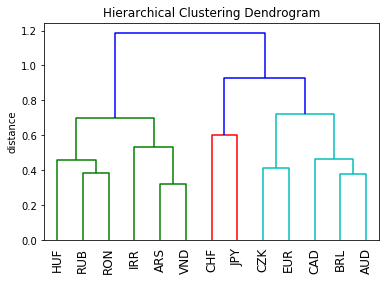

In [71]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
linked = linkage(df.T.values, method = 'average')
plt.title('Hierarchical Clustering Dendrogram based on several currencies')
plt.ylabel('distance')
dendrogram(
    linked, labels=curr,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  
)
plt.show()


There are some currencies which are close to each other i.e. the normalized average distance is smaller. Exchange rates are following the demand supply fluctuation, so this means that the ones in the same cluster have similar demand and supply processes. For example, the HUF is not a stable currency comparing to EUR (bigger sovereing credit risk), so the demand is much different for that, therefore they are not in one cluster. 